# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [26]:
#Temperature (F) vs. Latitude
#Humidity (%) vs. Latitude
#Cloudiness (%) vs. Latitude
#Wind Speed (mph) vs. Latitude


cities_weather_list=[]


url='https://api.openweathermap.org/data/2.5/weather?q='
api_part='&units=Imperial&appid='
city="bluff"
query = url + city + api_part + weather_api_key
response = requests.get(query)
response_json = response.json()
print(response_json)
        
for city in cities:
    query = url + city + api_part + weather_api_key
    try:
        print(city)
        response = requests.get(query)
        response_json = response.json()
        lat=response_json["coord"]["lat"]
        lng=response_json["coord"]["lon"]
        maxtemp=response_json["main"]["temp_max"]
        humidity=response_json["main"]["humidity"]
        cloudiness=response_json["clouds"]["all"]
        windspeed=response_json["wind"]["speed"]
        country=response_json["sys"]["country"]
        date=response_json["dt"]

        cities_weather_list.append({
            'City':city, 
            'Lat': lat,
            'Lng': lng,
            'Max Temp': maxtemp,
            'Humidity': humidity,
            'Cloudiness': cloudiness,
            'Wind Speed': windspeed,
            'Country': country,
            'Date': date
        })
    
    except:
        print("skipping")
        pass

{'coord': {'lon': 168.33, 'lat': -46.6}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 49.62, 'feels_like': 29.77, 'temp_min': 49.62, 'temp_max': 49.62, 'pressure': 1006, 'humidity': 70, 'sea_level': 1006, 'grnd_level': 1001}, 'visibility': 10000, 'wind': {'speed': 31.38, 'deg': 279}, 'clouds': {'all': 91}, 'dt': 1597106795, 'sys': {'country': 'NZ', 'sunrise': 1597089233, 'sunset': 1597125004}, 'timezone': 43200, 'id': 2206939, 'name': 'Bluff', 'cod': 200}
mataura
hermanus
busselton
cape town
pokhara
bluff
svetlogorsk
babanusah
skipping
yellowknife
vila do maio
avarua
great yarmouth
port alfred
ushuaia
gizo
hilo
askino
albany
kununurra
barrow
amderma
skipping
saldanha
narsaq
esperance
tumannyy
skipping
san cristobal
rikitea
sovetskiy
alenquer
vanimo
pisco
port hedland
punta arenas
luderitz
mahebourg
saskylakh
itarema
urdzhar
skipping
muli
klaksvik
carnarvon
east london
oktyabrskoye
pathein
jamestown
ill

In [27]:
cities_weather_df=pd.DataFrame(cities_weather_list)
cities_weather_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [28]:
cities_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mataura,-46.19,168.86,51.03,60,70,7.11,NZ,1597106795
1,hermanus,-34.42,19.23,44.01,96,0,13.76,ZA,1597106795
2,busselton,-33.65,115.33,57.00,91,95,16.28,AU,1597106795
3,cape town,-33.93,18.42,57.99,87,20,11.41,ZA,1597106796
4,pokhara,28.23,83.98,74.57,75,92,0.47,NP,1597106796


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [29]:
cities_weather_df.to_csv(output_data_file, index_label="City_ID")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [30]:
cities_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,5.580000e+02
mean,20.147563,23.255573,68.595341,72.378136,50.661290,7.953280,1.597107e+09
std,33.068154,90.521290,13.383092,18.442263,41.709799,5.538165,7.326188e+01
min,-54.800000,-175.200000,32.000000,3.000000,0.000000,0.470000,1.597107e+09
25%,-5.502500,-54.875000,58.457500,63.000000,1.000000,3.522500,1.597107e+09
50%,22.100000,28.055000,71.430000,76.500000,53.500000,6.930000,1.597107e+09
75%,48.440000,105.060000,78.800000,86.000000,97.000000,10.942500,1.597107e+09
max,77.480000,179.320000,102.000000,100.000000,100.000000,32.440000,1.597107e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [31]:
# Extract relevant fields from the data frame
lat=cities_weather_df["Lat"]
maxtemp=cities_weather_df["Max Temp"]
humidity=cities_weather_df["Humidity"]
cloudiness=cities_weather_df["Cloudiness"]
windspeed=cities_weather_df["Wind Speed"]

# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

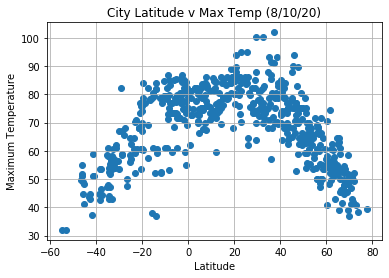

In [32]:
plt.scatter(lat,maxtemp)
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.title("City Latitude v Max Temp (8/10/20)")
plt.grid(True)
plt.savefig("output_data/fig1.png")
plt.show()

## Latitude vs. Humidity Plot

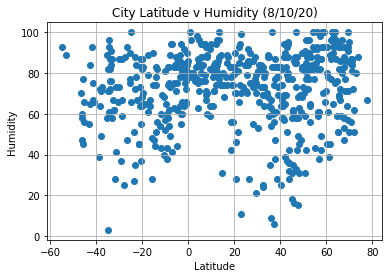

In [38]:
plt.scatter(lat,humidity)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude v Humidity (8/10/20)")
plt.grid(True)
plt.savefig("output_data/fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

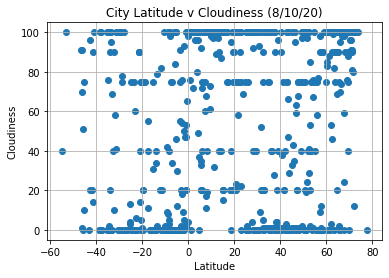

In [39]:
plt.scatter(lat,cloudiness)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude v Cloudiness (8/10/20)")
plt.grid(True)
plt.savefig("output_data/fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

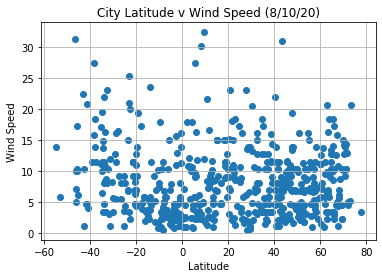

In [40]:
plt.scatter(lat,windspeed)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude v Wind Speed (8/10/20)")
plt.grid(True)
plt.savefig("output_data/fig4.png")
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8271188905041935


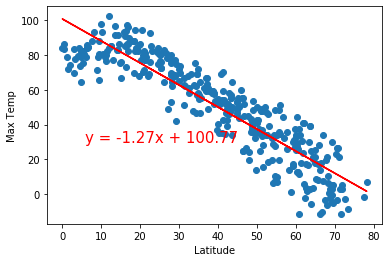

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39936284758885965


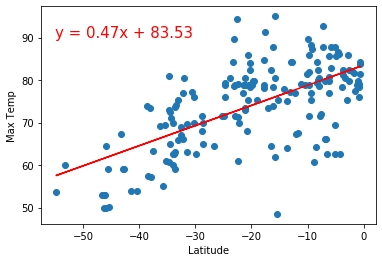

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10829462153873139


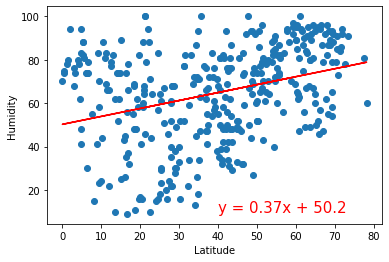

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008996079328825663


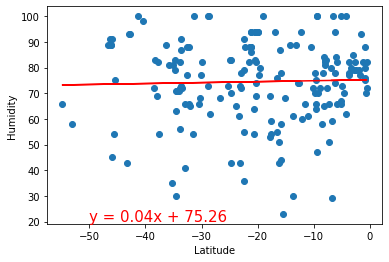

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05768812657005063


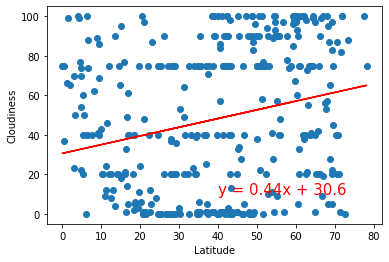

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0684912094859049


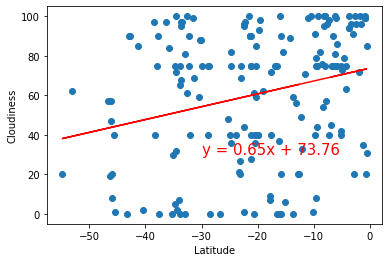

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


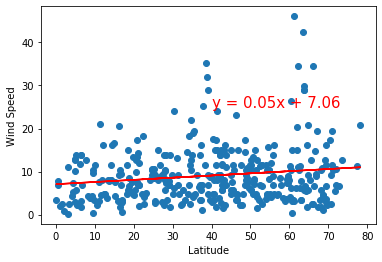

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03381889207758188


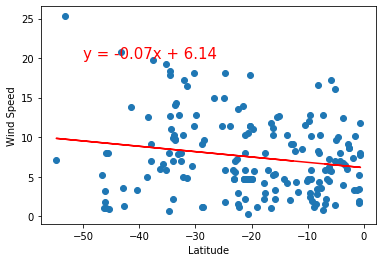